In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

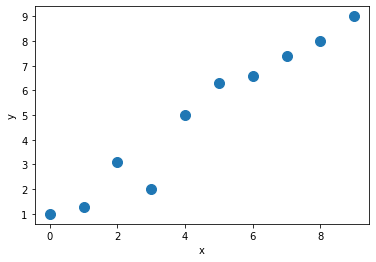

In [7]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('х')
plt.ylabel('у')
plt.show()

In [10]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

In [19]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w * x + self.b

In [22]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [25]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        # прекратить бесконечный цикл
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps == 0:
        print('Эпоха {:4d} Шаг {:2d} Потеря {:6.4f}'.format(int(i / steps_per_epoch), i, loss_val))

Эпоха    0 Шаг  0 Потеря 43.5600
Эпоха   10 Шаг 100 Потеря 0.7530
Эпоха   20 Шаг 200 Потеря 20.1759
Эпоха   30 Шаг 300 Потеря 23.3976
Эпоха   40 Шаг 400 Потеря 6.3481
Эпоха   50 Шаг 500 Потеря 4.6356
Эпоха   60 Шаг 600 Потеря 0.2411
Эпоха   70 Шаг 700 Потеря 0.2036
Эпоха   80 Шаг 800 Потеря 3.8177
Эпоха   90 Шаг 900 Потеря 0.9416
Эпоха  100 Шаг 1000 Потеря 0.7035
Эпоха  110 Шаг 1100 Потеря 0.0348
Эпоха  120 Шаг 1200 Потеря 0.5404
Эпоха  130 Шаг 1300 Потеря 0.1170
Эпоха  140 Шаг 1400 Потеря 0.1195
Эпоха  150 Шаг 1500 Потеря 0.0944
Эпоха  160 Шаг 1600 Потеря 0.4670
Эпоха  170 Шаг 1700 Потеря 2.0695
Эпоха  180 Шаг 1800 Потеря 0.0020
Эпоха  190 Шаг 1900 Потеря 0.3612


In [28]:
print('Финальные параметры: ', model.w.numpy(), model.b.numpy())

Финальные параметры:  2.6576622 4.8798566


In [31]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

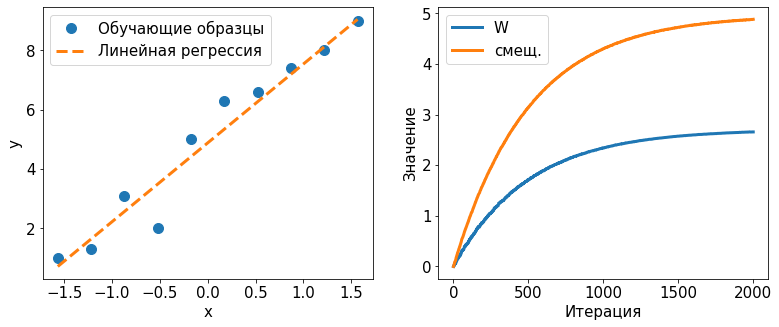

In [35]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Обучающие образцы', 'Линейная регрессия'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('у', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'смещ.'], fontsize=15)
ax.set_xlabel('Итерация', size=15)
ax.set_ylabel('Значение', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['mae', 'mse'])

In [37]:
model.fit(X_train_norm, y_train,
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 999us/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 889us/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 667us/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 666us/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 778us/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 889us/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 667us/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 1000us/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 889us/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epo

2.7067394 4.9657216


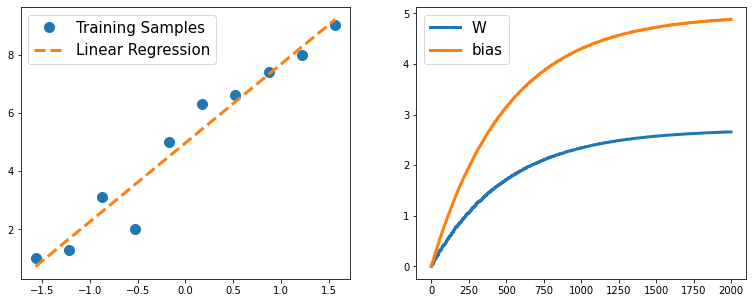

In [38]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()